In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('dados/kc_house_data.csv')

In [3]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dados.shape

(21613, 21)

In [5]:
dados.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [6]:
dados.corr().round(4)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0000,-0.0168,0.0013,0.0052,-0.0123,-0.1321,0.0185,-0.0027,0.0116,-0.0238,0.0081,-0.0108,-0.0052,0.0214,-0.0169,-0.0082,-0.0019,0.0208,-0.0029,-0.1388
price,-0.0168,1.0000,0.3083,0.5251,0.7020,0.0897,0.2568,0.2664,0.3973,0.0364,0.6674,0.6056,0.3238,0.0540,0.1264,-0.0532,0.3070,0.0216,0.5854,0.0824
bedrooms,0.0013,0.3083,1.0000,0.5159,0.5767,0.0317,0.1754,-0.0066,0.0795,0.0285,0.3570,0.4776,0.3031,0.1542,0.0188,-0.1527,-0.0089,0.1295,0.3916,0.0292
bathrooms,0.0052,0.5251,0.5159,1.0000,0.7547,0.0877,0.5007,0.0637,0.1877,-0.1250,0.6650,0.6853,0.2838,0.5060,0.0507,-0.2039,0.0246,0.2230,0.5686,0.0872
sqft_living,-0.0123,0.7020,0.5767,0.7547,1.0000,0.1728,0.3539,0.1038,0.2846,-0.0588,0.7627,0.8766,0.4350,0.3180,0.0554,-0.1994,0.0525,0.2402,0.7564,0.1833
sqft_lot,-0.1321,0.0897,0.0317,0.0877,0.1728,1.0000,-0.0052,0.0216,0.0747,-0.0090,0.1136,0.1835,0.0153,0.0531,0.0076,-0.1296,-0.0857,0.2295,0.1446,0.7186
floors,0.0185,0.2568,0.1754,0.5007,0.3539,-0.0052,1.0000,0.0237,0.0294,-0.2638,0.4582,0.5239,-0.2457,0.4893,0.0063,-0.0591,0.0496,0.1254,0.2799,-0.0113
waterfront,-0.0027,0.2664,-0.0066,0.0637,0.1038,0.0216,0.0237,1.0000,0.4019,0.0167,0.0828,0.0721,0.0806,-0.0262,0.0929,0.0303,-0.0143,-0.0419,0.0865,0.0307
view,0.0116,0.3973,0.0795,0.1877,0.2846,0.0747,0.0294,0.4019,1.0000,0.0460,0.2513,0.1676,0.2769,-0.0534,0.1039,0.0848,0.0062,-0.0784,0.2804,0.0726
condition,-0.0238,0.0364,0.0285,-0.1250,-0.0588,-0.0090,-0.2638,0.0167,0.0460,1.0000,-0.1447,-0.1582,0.1741,-0.3614,-0.0606,0.0030,-0.0149,-0.1065,-0.0928,-0.0034


<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='$'>

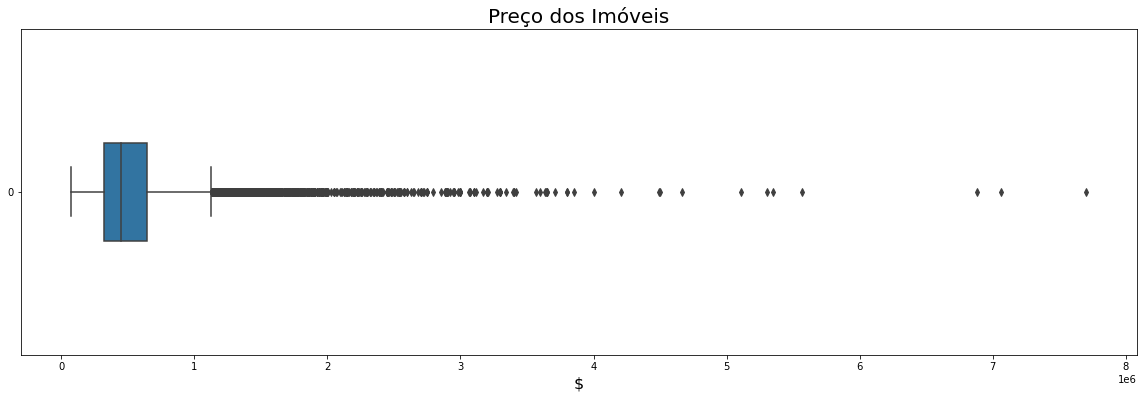

In [7]:
ax = sns.boxplot(data = dados['price'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('$', fontsize=16)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço dos Imóveis ($)', ylabel='Density'>

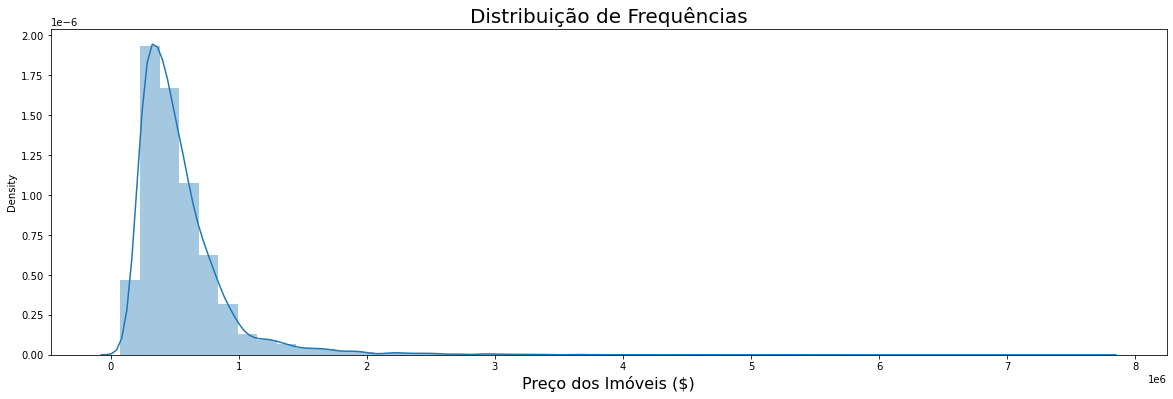

In [8]:
ax = sns.distplot(dados['price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis ($)', fontsize=16)
ax

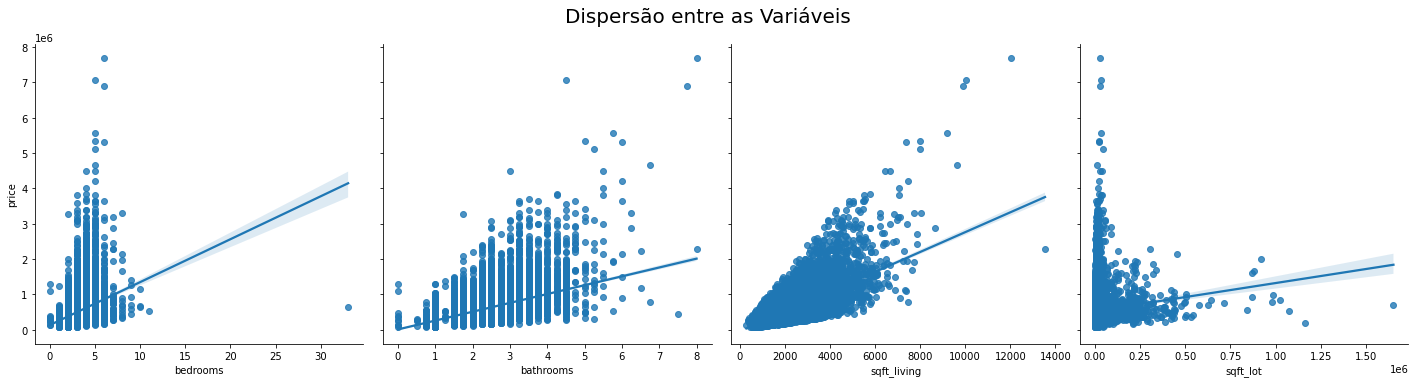

In [9]:
ax = sns.pairplot(dados, y_vars = 'price', x_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot' ], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

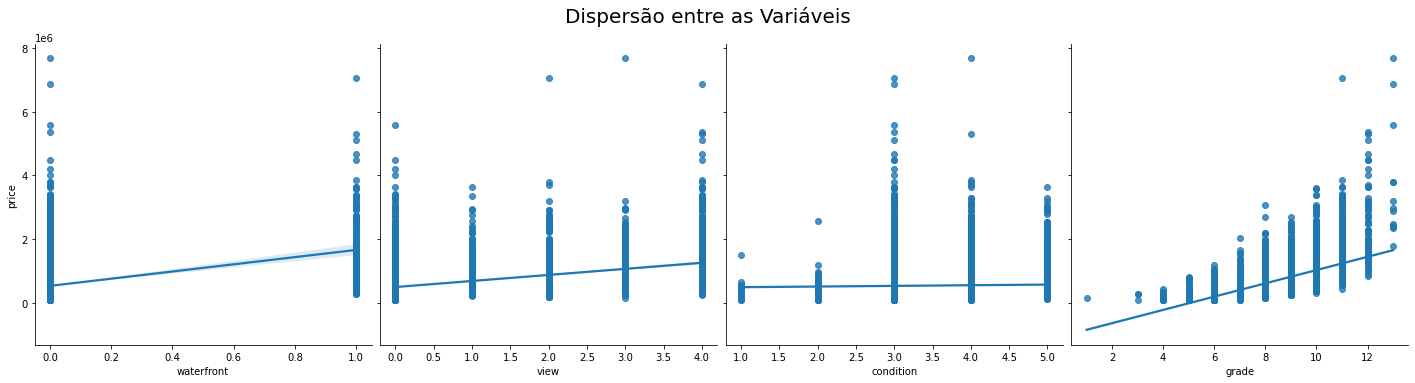

In [10]:
ax = sns.pairplot(dados, y_vars = 'price', x_vars = ['waterfront', 'view', 'condition', 'grade' ], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

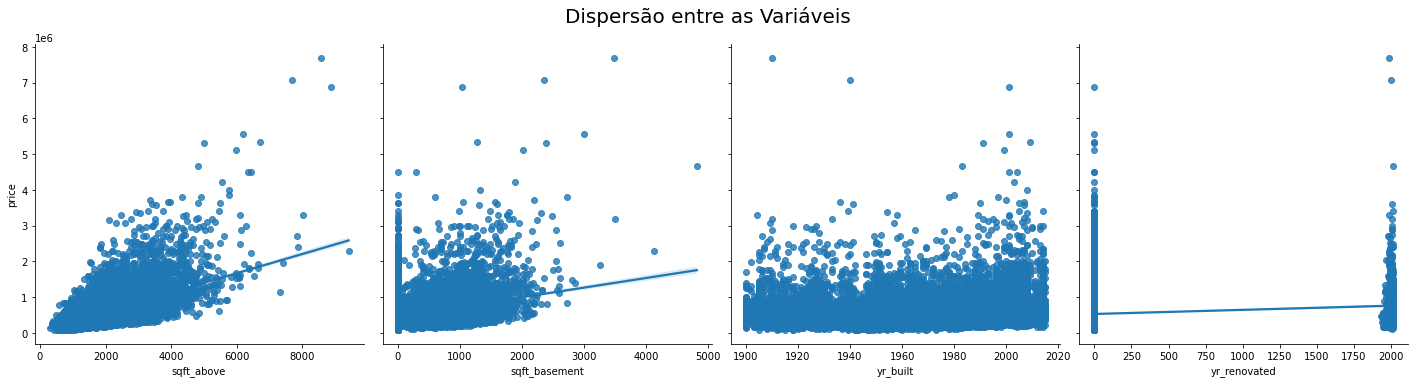

In [11]:
ax = sns.pairplot(dados, y_vars = 'price', x_vars = ['sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated' ], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

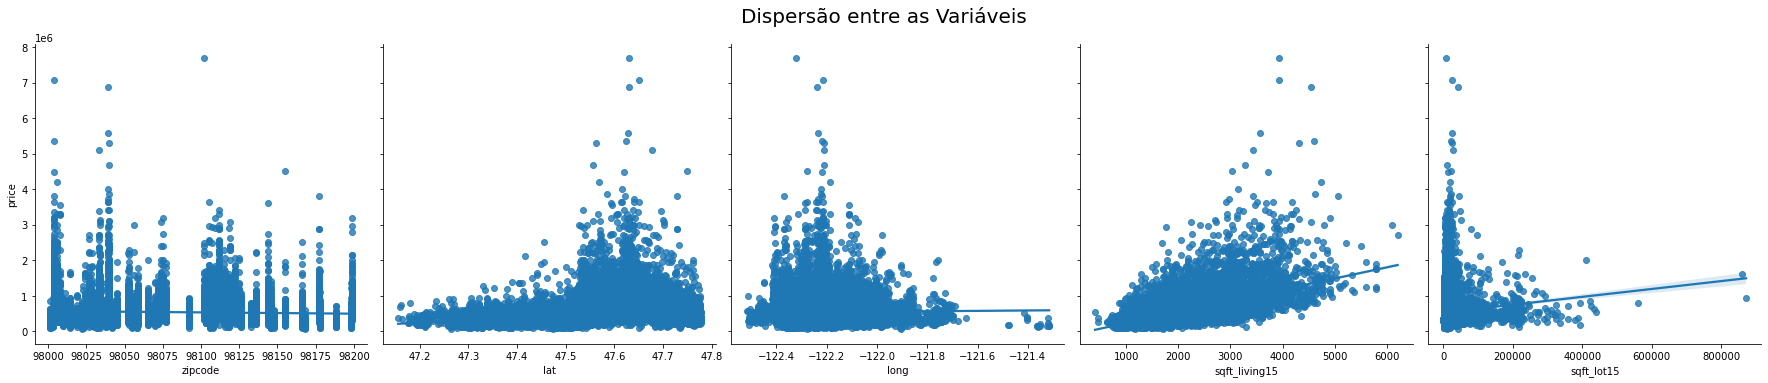

In [12]:
ax = sns.pairplot(dados, y_vars = 'price', x_vars = ['zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15' ], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [13]:
dados['log_price'] = np.log(dados['price'])
dados['log_bedrooms'] = np.log(dados['bedrooms'] + 1)
dados['log_bathrooms'] = np.log(dados['bathrooms'] + 1)
dados['log_sqft_living'] = np.log(dados['sqft_living'])
dados['log_sqft_lot'] = np.log(dados['sqft_lot'])
dados['log_waterfront'] = np.log(dados['waterfront'] + 1)
dados['log_view'] = np.log(dados['view'] + 1)
dados['log_condition'] = np.log(dados['condition'])
dados['log_grade'] = np.log(dados['grade'])
dados['log_sqft_above'] = np.log(dados['sqft_above'])
dados['log_sqft_basement'] = np.log(dados['sqft_basement'] + 1)
dados['log_yr_built'] = np.log(dados['yr_built'])
dados['log_yr_renovated'] = np.log(dados['yr_renovated'] + 1)
dados['log_zipcode'] = np.log(dados['zipcode'])
dados['log_lat'] = np.log(dados['lat'])
dados['log_long'] = np.log(dados['long'] + 123.52)
dados['log_sqft_living15'] = np.log(dados['sqft_living15'])
dados['log_sqft_lot15'] = np.log(dados['sqft_lot15'])

In [14]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,log_grade,log_sqft_above,log_sqft_basement,log_yr_built,log_yr_renovated,log_zipcode,log_lat,log_long,log_sqft_living15,log_sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1.945910,7.073270,0.000000,7.578145,0.000000,11.494537,3.860965,0.233490,7.200425,8.639411
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1.945910,7.682482,5.993961,7.576097,7.596894,11.493997,3.865372,0.183155,7.432484,8.941022
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1.791759,6.646391,0.000000,7.566828,0.000000,11.493008,3.865726,0.252314,7.908387,8.994917
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1.945910,6.956545,6.814543,7.583248,0.000000,11.494110,3.861168,0.119559,7.215240,8.517193
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,2.079442,7.426549,0.000000,7.594381,0.000000,11.493478,3.863186,0.388658,7.495542,8.923058


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis', ylabel='Density'>

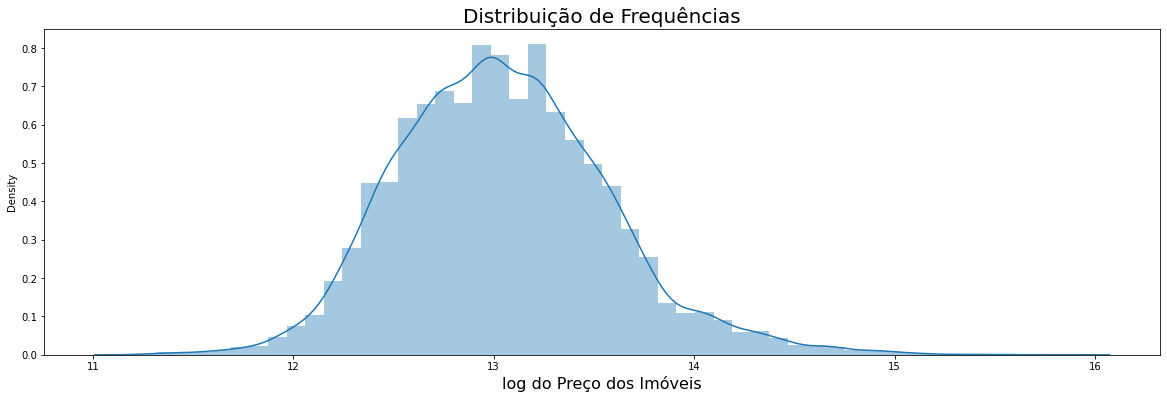

In [15]:
ax = sns.distplot(dados['log_price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

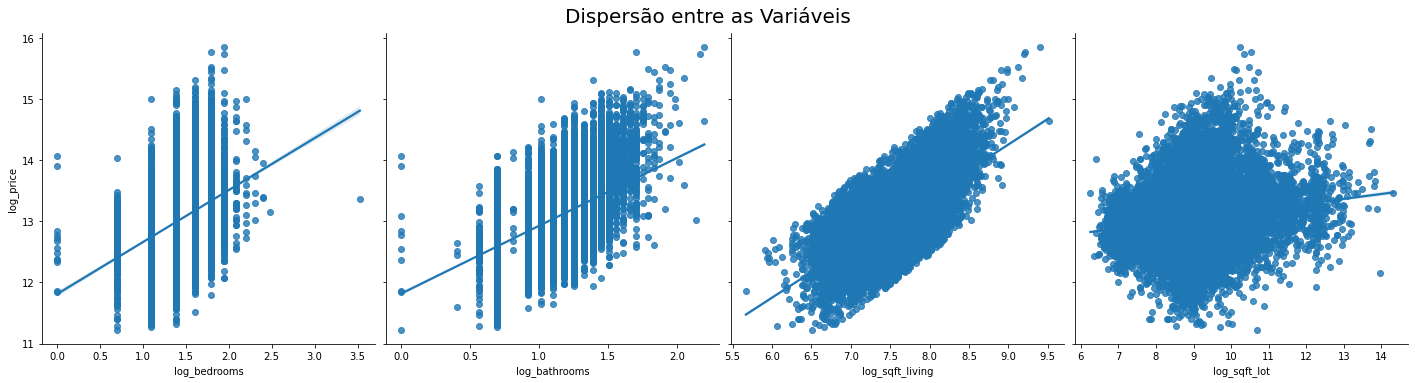

In [16]:
ax = sns.pairplot(dados, y_vars = 'log_price', x_vars = ['log_bedrooms', 'log_bathrooms', 'log_sqft_living', 'log_sqft_lot'], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

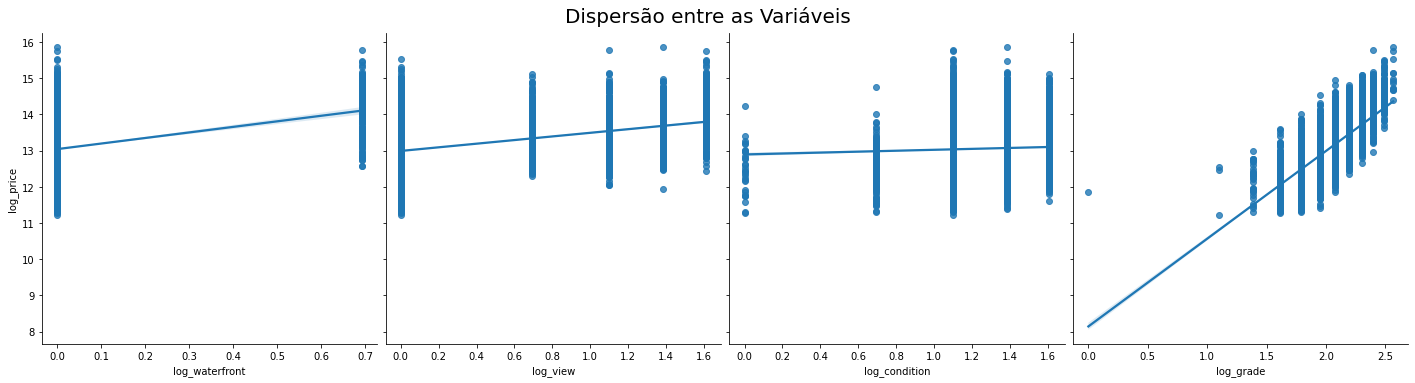

In [17]:
ax = sns.pairplot(dados, y_vars = 'log_price', x_vars = ['log_waterfront', 'log_view', 'log_condition', 'log_grade'], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

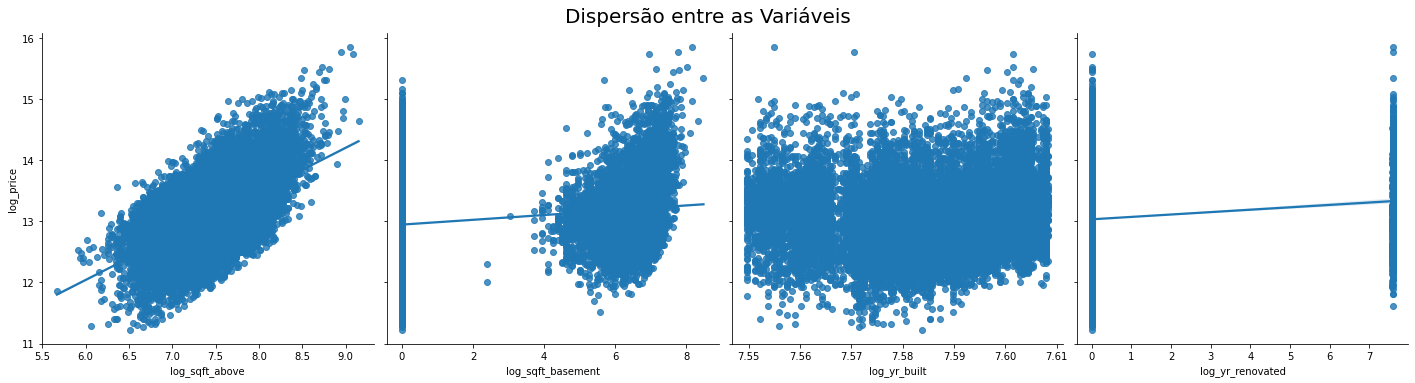

In [18]:
ax = sns.pairplot(dados, y_vars = 'log_price', x_vars = ['log_sqft_above', 'log_sqft_basement', 'log_yr_built', 'log_yr_renovated'], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

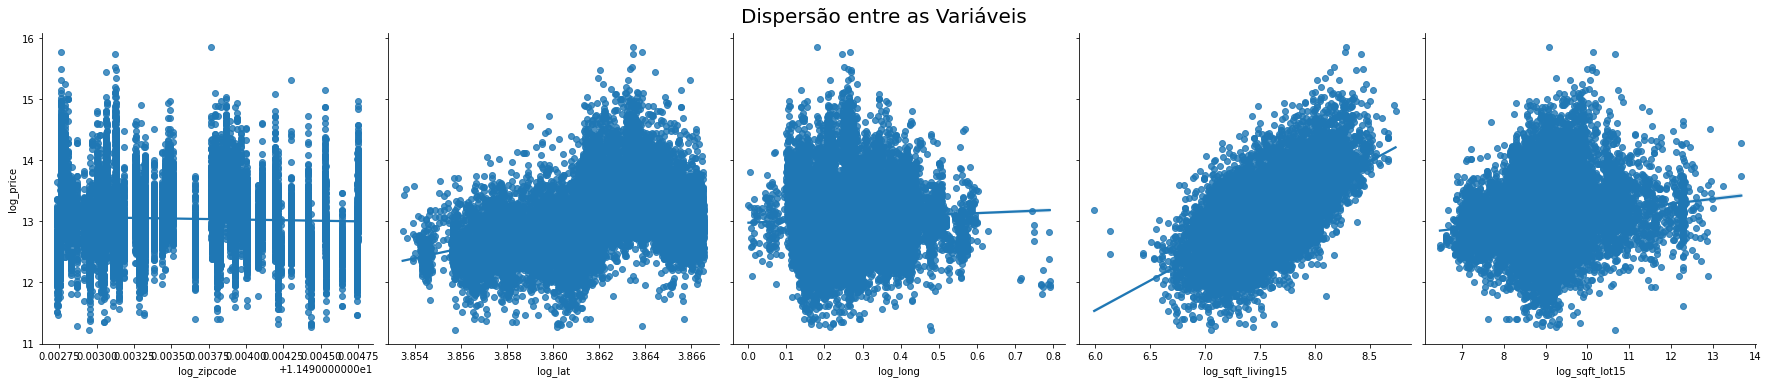

In [19]:
ax = sns.pairplot(dados, y_vars = 'log_price', x_vars = ['log_zipcode', 'log_lat', 'log_long', 'log_sqft_living15', 'log_sqft_lot15'], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Possíveis melhores variáveis para se trabalhar: log_bedrooms, log_bathrooms, log_sqft_living, log_grade, log_sqft_above, log_sqft_living15

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = dados['log_price']

In [22]:
X = dados[['log_bedrooms', 'log_bathrooms', 'log_sqft_living', 'log_sqft_lot',
           'log_waterfront', 'log_view', 'log_condition', 'log_grade', 'log_sqft_above',
           'log_sqft_basement', 'log_yr_built']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2811)

In [24]:
import statsmodels.api as sm

In [25]:
X_train_constant = sm.add_constant(X_train)

In [26]:
X_train_constant

,const,log_bedrooms,log_bathrooms,log_sqft_living,log_sqft_lot,log_waterfront,log_view,log_condition,log_grade,log_sqft_above,log_sqft_basement,log_yr_built
15218,1.0,1.609438,1.252763,7.958577,9.546813,0.0,0.0,1.098612,2.079442,7.958577,0.000000,7.598399
17470,1.0,1.791759,1.386294,8.271293,9.692767,0.0,0.0,1.386294,2.197225,7.969012,6.928538,7.580700
13913,1.0,1.386294,1.252763,7.600902,9.038840,0.0,0.0,1.386294,1.945910,7.170120,6.552508,7.584773
6687,1.0,1.386294,1.178655,7.528332,9.033365,0.0,0.0,1.098612,1.945910,7.528332,0.000000,7.598399
5992,1.0,1.098612,1.098612,7.293018,8.048149,0.0,0.0,1.098612,1.791759,7.293018,0.000000,7.603399
...,...,...,...,...,...,...,...,...,...,...,...,...
15940,1.0,1.386294,1.011601,7.138867,9.142704,0.0,0.0,1.386294,1.945910,7.138867,0.000000,7.582229
979,1.0,1.386294,0.693147,6.937314,9.035987,0.0,0.0,1.386294,1.945910,6.937314,0.000000,7.582229
10581,1.0,1.098612,0.693147,6.672033,9.560997,0.0,0.0,1.098612,1.945910,6.672033,0.000000,7.576097
8639,1.0,1.386294,1.011601,7.383989,8.974618,0.0,0.0,1.386294,2.079442,7.177782,5.707110,7.580700


In [27]:
modelo_statsmodels = sm.OLS(y_train, X_train_constant, hasconst = True).fit()

In [28]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2851.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:03:23   Log-Likelihood:                -4531.5
No. Observations:               17290   AIC:                             9087.
Df Residuals:                   17278   BIC:                             9180.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                89.1156      1.628     54.754      0.000      85.925      92.306
log_bedrooms         -0.2046      0.015    -13.487      0.000      -0.234      -0.175
log_bathrooms         0.2205      0.017     12.851      0.000       0.187       0.254
log_sqft_living       0.1999      0.029      6.928      0.000       0.143       0.257
log_sqft_lot         -0.0458      0.003    -15.392      0.000      -0.052      -0.040
log_waterfront        0.6005      0.042     14.410      0.000       0.519       0.682
log_view              0.1253      0.007     16.854      0.000       0.111       0.140
log_condition         0.0993      0.014      6.958      0.000       0.071       0.127
log_grade             1.7607      0.027     65.317      0.000       1.708       1.814
log_sqft_above        0.2736      0.028      9.907      0.000       0.219       0.328
log_sqft_basement     0.0183      0.002      9.526      0.000       0.015       0.022
log_yr_built        -10.9256      0.215    -50.818      0.000     -11.347     -10.504
==============================================================================
Omnibus:                      104.931   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.348
Skew:                          -0.004   Prob(JB):                     1.12e-34
Kurtosis:                       3.466   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
modelo = LinearRegression()

In [31]:
modelo.fit(X_train, y_train)

LinearRegression()

In [32]:
print(f'R**2 = {modelo.score(X_train, y_train).round(3)}')

R**2 = 0.645


In [33]:
y_previsto = modelo.predict(X_test)

In [34]:
print(f'R**2 = {metrics.r2_score(y_test, y_previsto).round(3)}')

R**2 = 0.639


In [35]:
entrada = X_test[0:1]
entrada

,log_bedrooms,log_bathrooms,log_sqft_living,log_sqft_lot,log_waterfront,log_view,log_condition,log_grade,log_sqft_above,log_sqft_basement,log_yr_built
3490,1.609438,1.321756,8.058327,10.662727,0.0,0.0,1.098612,2.197225,8.058327,0.0,7.598399


In [36]:
modelo.predict(entrada)[0]

13.366597624626777

In [37]:
np.exp(modelo.predict(entrada)[0])

638321.6728120625

In [38]:
bedrooms = 5
bathrooms = 5
sqft_living = 1000
sqft_lot = 2000
waterfront = 1
view = 4
condition = 3
grade = 7
sqft_above = 861
sqft_basement = 0
yr_built = 2021


entrada = [[np.log(bedrooms + 1), np.log(bathrooms + 1), np.log(sqft_living), np.log(sqft_lot), np.log(waterfront + 1),
           np.log(view + 1), np.log(condition), np.log(grade), np.log(sqft_above), np.log(sqft_basement + 1),
           np.log(yr_built)]]

print(f'$ {np.exp(modelo.predict(entrada))[0]:.2f}')

$ 451853.36


In [39]:
modelo.intercept_

89.11564553170825

In [40]:
np.exp(modelo.intercept_)

5.040029815978443e+38

In [41]:
modelo.coef_

array([ -0.20458399,   0.22048423,   0.19994652,  -0.04575223,
         0.60050363,   0.1252806 ,   0.09930807,   1.76067402,
         0.27361427,   0.01834245, -10.92561302])

In [42]:
X.columns

Index(['log_bedrooms', 'log_bathrooms', 'log_sqft_living', 'log_sqft_lot',
       'log_waterfront', 'log_view', 'log_condition', 'log_grade',
       'log_sqft_above', 'log_sqft_basement', 'log_yr_built'],
      dtype='object')

In [43]:
index = ['Intercepto', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living', 'log_sqft_lot',
       'log_waterfront', 'log_view', 'log_condition', 'log_grade',
       'log_sqft_above', 'log_sqft_basement', 'log_yr_built']

In [44]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,89.115646
log_bedrooms,-0.204584
log_bathrooms,0.220484
log_sqft_living,0.199947
log_sqft_lot,-0.045752
log_waterfront,0.600504
log_view,0.125281
log_condition,0.099308
log_grade,1.760674
log_sqft_above,0.273614


In [45]:
y_previsto_train = modelo.predict(X_train)

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

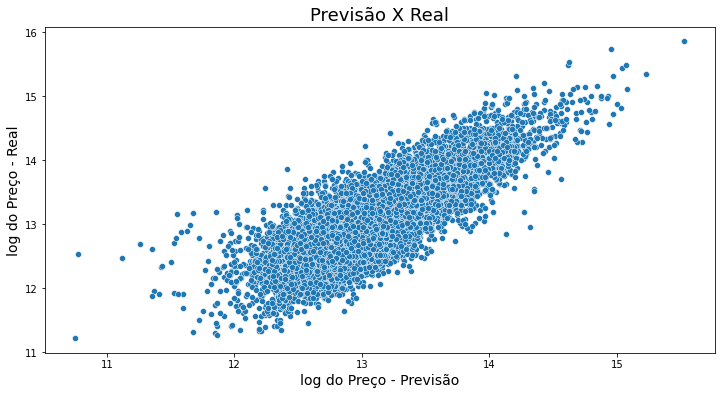

In [46]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

In [47]:
residuo = y_train - y_previsto_train

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='log do Preço', ylabel='Density'>

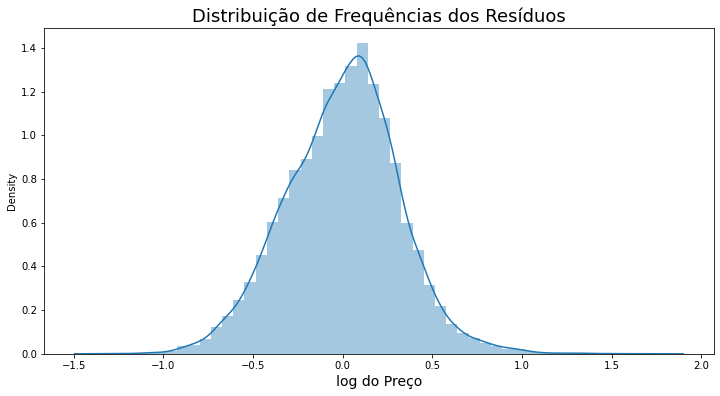

In [48]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax